In [49]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import matplotlib.pyplot as plt
import numpy as np

In [50]:
df_stats = pd.read_csv("data/Weekdays/Stats_viz.csv")
df_stats.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,day_of_week,hour_of_day,hour_of_week
0,0.657461,0.609258,5.2817,-7.500937,0.141651,0.247811,0.052051,0.187337,0.452291,121.448847,212383.5268,3.9236,Monday,0,0
1,0.655133,0.614405,5.2484,-7.433977,0.147915,0.249767,0.052430,0.192777,0.450049,121.370097,214232.5865,3.9262,Monday,1,1
2,0.651133,0.611810,5.3107,-7.632939,0.147637,0.247034,0.059010,0.193416,0.441818,121.043238,215316.5980,3.9273,Monday,2,2
3,0.650636,0.612643,5.2473,-7.689965,0.152415,0.254143,0.065514,0.194838,0.443261,120.665653,216911.3803,3.9258,Monday,3,3
4,0.650832,0.626252,5.2427,-7.405199,0.144472,0.241053,0.055978,0.194875,0.457499,121.065582,217015.1031,3.9185,Monday,4,4


<AxesSubplot:xlabel='hour_of_week'>

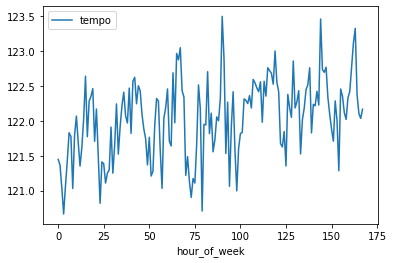

In [133]:
df_stats.plot(x="hour_of_week", y="tempo")

Text(0.8579000000000001, 0.05, 'Sunday')

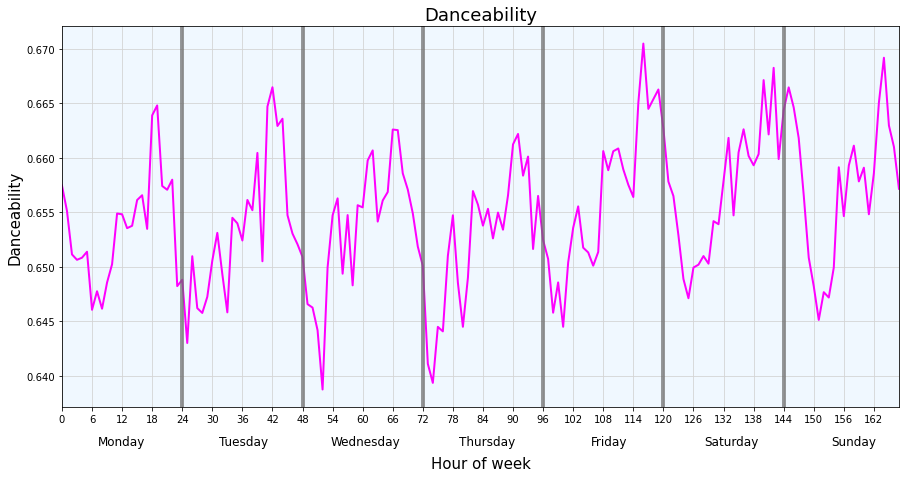

In [126]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.margins(x = 0)
plt.plot(df_stats['hour_of_week'],df_stats['danceability'], c = "magenta", lw = 2)
ax.set_facecolor('aliceblue')
ax.grid(color = 'lightgray', alpha = 1)
ax.set_title("Danceability", fontsize = 18)
plt.xlabel('Hour of week', fontsize = 15, labelpad = 32)
plt.ylabel('Danceability', fontsize = 15)

plt.xticks(np.arange(0, 168, 6.0))
plt.axvline(x = 24, alpha = 0.7, linewidth = 3.9, c = 'dimgray')
plt.axvline(x = 48, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 72, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 96, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 120, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 144, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')


plt.figtext(0.1799, 0.05, 'Monday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.113, 0.05, 'Tuesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.226, 0.05, 'Wednesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.339, 0.05, 'Thursday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.452, 0.05, 'Friday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.565, 0.05, 'Saturday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.678, 0.05, 'Sunday', wrap = True, horizontalalignment = 'center', fontsize = 12)


Text(0.8579000000000001, 0.05, 'Sunday')

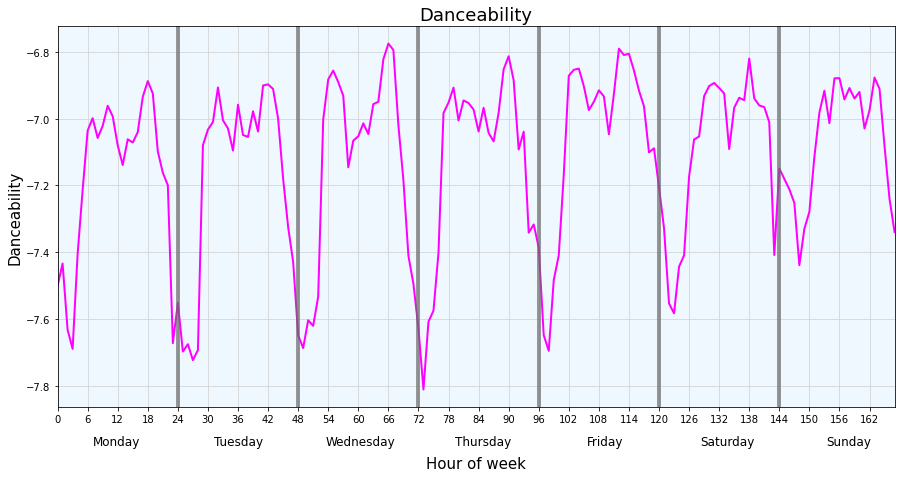

In [127]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.margins(x = 0)
plt.plot(df_stats['hour_of_week'],df_stats['loudness'], c = "magenta", lw = 2)
ax.set_facecolor('aliceblue')
ax.grid(color = 'lightgray', alpha = 1)
ax.set_title("Danceability", fontsize = 18)
plt.xlabel('Hour of week', fontsize = 15, labelpad = 32)
plt.ylabel('Danceability', fontsize = 15)

plt.xticks(np.arange(0, 168, 6.0))
plt.axvline(x = 24, alpha = 0.7, linewidth = 3.9, c = 'dimgray')
plt.axvline(x = 48, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 72, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 96, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 120, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 144, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')


plt.figtext(0.1799, 0.05, 'Monday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.113, 0.05, 'Tuesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.226, 0.05, 'Wednesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.339, 0.05, 'Thursday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.452, 0.05, 'Friday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.565, 0.05, 'Saturday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.678, 0.05, 'Sunday', wrap = True, horizontalalignment = 'center', fontsize = 12)

Text(0.8579000000000001, 0.05, 'Sunday')

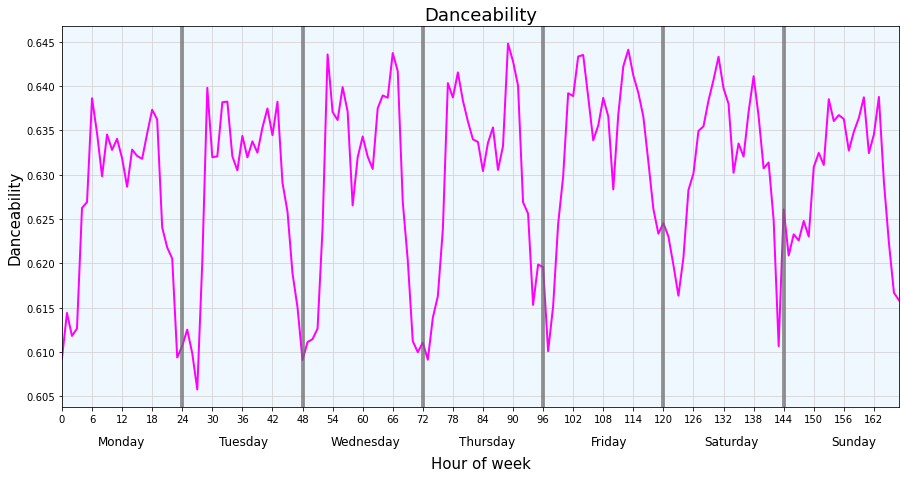

In [128]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.margins(x = 0)
plt.plot(df_stats['hour_of_week'],df_stats['energy'], c = "magenta", lw = 2)
ax.set_facecolor('aliceblue')
ax.grid(color = 'lightgray', alpha = 1)
ax.set_title("Danceability", fontsize = 18)
plt.xlabel('Hour of week', fontsize = 15, labelpad = 32)
plt.ylabel('Danceability', fontsize = 15)

plt.xticks(np.arange(0, 168, 6.0))
plt.axvline(x = 24, alpha = 0.7, linewidth = 3.9, c = 'dimgray')
plt.axvline(x = 48, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 72, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 96, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 120, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 144, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')


plt.figtext(0.1799, 0.05, 'Monday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.113, 0.05, 'Tuesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.226, 0.05, 'Wednesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.339, 0.05, 'Thursday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.452, 0.05, 'Friday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.565, 0.05, 'Saturday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.678, 0.05, 'Sunday', wrap = True, horizontalalignment = 'center', fontsize = 12)

Text(0.8579000000000001, 0.05, 'Sunday')

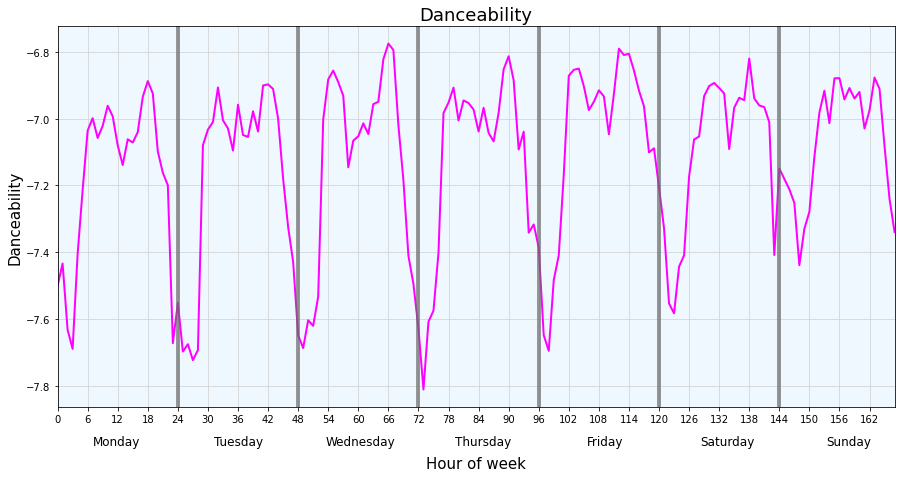

In [129]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.margins(x = 0)
plt.plot(df_stats['hour_of_week'],df_stats['loudness'], c = "magenta", lw = 2)
ax.set_facecolor('aliceblue')
ax.grid(color = 'lightgray', alpha = 1)
ax.set_title("Danceability", fontsize = 18)
plt.xlabel('Hour of week', fontsize = 15, labelpad = 32)
plt.ylabel('Danceability', fontsize = 15)

plt.xticks(np.arange(0, 168, 6.0))
plt.axvline(x = 24, alpha = 0.7, linewidth = 3.9, c = 'dimgray')
plt.axvline(x = 48, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 72, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 96, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 120, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 144, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')


plt.figtext(0.1799, 0.05, 'Monday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.113, 0.05, 'Tuesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.226, 0.05, 'Wednesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.339, 0.05, 'Thursday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.452, 0.05, 'Friday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.565, 0.05, 'Saturday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.678, 0.05, 'Sunday', wrap = True, horizontalalignment = 'center', fontsize = 12)

Text(0.8579000000000001, 0.05, 'Sunday')

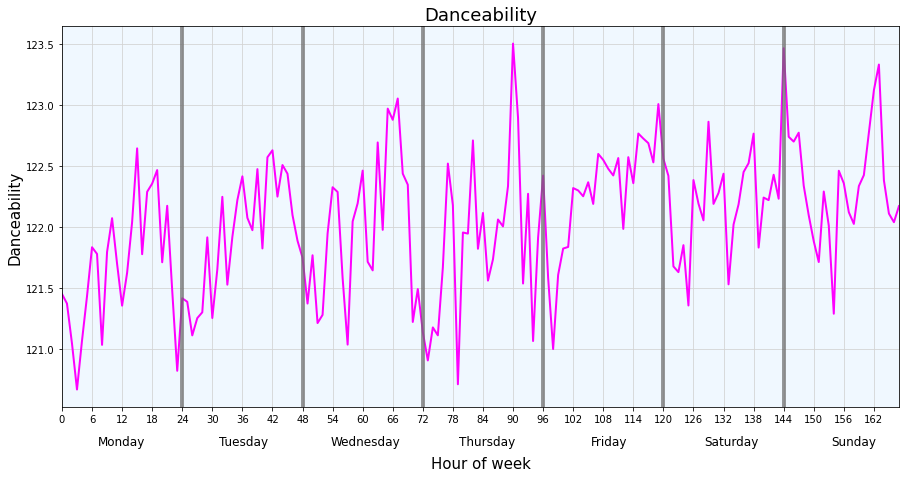

In [134]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.margins(x = 0)
plt.plot(df_stats['hour_of_week'],df_stats['tempo'], c = "magenta", lw = 2)
ax.set_facecolor('aliceblue')
ax.grid(color = 'lightgray', alpha = 1)
ax.set_title("Danceability", fontsize = 18)
plt.xlabel('Hour of week', fontsize = 15, labelpad = 32)
plt.ylabel('Danceability', fontsize = 15)

plt.xticks(np.arange(0, 168, 6.0))
plt.axvline(x = 24, alpha = 0.7, linewidth = 3.9, c = 'dimgray')
plt.axvline(x = 48, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 72, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 96, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 120, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')
plt.axvline(x = 144, alpha = 0.7, linewidth = 3.9, c = 'dimgrey')


plt.figtext(0.1799, 0.05, 'Monday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.113, 0.05, 'Tuesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.226, 0.05, 'Wednesday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.339, 0.05, 'Thursday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.452, 0.05, 'Friday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.565, 0.05, 'Saturday', wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.figtext(0.1799 + 0.678, 0.05, 'Sunday', wrap = True, horizontalalignment = 'center', fontsize = 12)